# Neural Networks from Scratch
### Arvind Mohan (CCS-2) and Ying Wai Li (CCS-7), Institutional Computing Training Team

<img src="figures/NNfromScratch.png" width=500>

## Day 1: Foundation of Neural Networks

## 1. The neural network model
* An artificial neural network (NN) is a Machine Learning model inspired by the networks of biological neurons in our brains.
* It is sometimes called Multilayer Perceptrons (MLPs).
* You may treat a NN as a mathematical function that takes inputs $\bf{X}$ and produces outputs $\bf{Y}$:

<img src="figures/function.png" width=300>

where $X=\left[x_{1}, \dots, x_{i}, \dots, x_{N}\right]$ and $Y=\left[y_{1}, \dots, y_{j}, \dots, y_{M}\right]$.


* With a neural network replacing the black box, it looks like this:

<img src="figures/fullyConnectedNN.png" width=600>

Steps in training a neural network:
---
  - Input data $\bf{X}$ is fed the *input layer* (blue) of the NN.
  - The data flows from layer to layer, left to right,  until the *output layer* (green) gives us the outputs $\bf{Y}$.  This procedure is called *forward propagation*.
  - Once we have the outputs, we can calculate the error $E$ which is a scalar.
  - Using $E$, we can adjust a parameter (a parameter can be a weight $w_{ij}$ or a bias $b_j$) by subtracting the derivative of the error with respect to the parameter, in a procedure called *backward propagation*, or *backpropagration*.
  - This process is repeated until a small enough error is achieved.
  - At the end of the training, a set of weights $w_{ij}$ and biases $b_j$ that minimizes the error $E$ would be resulted.

Notes: the above example is called a fully-connected neural network, because every node in one layer is connected to all the nodes in another layer.

## 2. Mathematical representation
### Forward propagation

<img src="figures/forwardpropagation.png" width=400>

Note: Variables of the same name but different colors are not the same!

The value of each output neuron can be calculated using:
$$ y_{j}=\sum_{i}^N x_{i}w_{ij} + b_{j} $$

This can be rewritten into matrix form:
$$ X=\left[x_{1}, \dots, x_{i}, \dots, x_{N}\right] $$
$$ Y=\left[y_{1}, \dots, y_{j}, \dots, y_{M}\right] $$
$$ W=\left[\begin{array}{ccccc}
w_{11} & \cdots & w_{1j} & \cdots & w_{1M} \\
       & \ddots &        &        &        \\
\vdots &        & w_{ij} &        & \vdots \\
       &        &        & \ddots &        \\
w_{N1} & \cdots & w_{Nj} & \cdots & w_{NM} \\
\end{array}\right] $$

$$ B=\left[b_{1}, \dots, b_{j}, \dots, b_{M} \right] $$

$$ Y = XW + B = F(X) $$

The function $F$ is constructed by the weights $W$ and the biases $B$, which are the quantities to train and optimize in a training procedure.

The output of one layer is the input of the next one:

<img src="figures/forwardpropagation2.png" width=500>

Let's represent the purple connections of the hidden layer (orange) and the output layer (green) by: $Y = G(X)$.
Putting all three layers together, the final outputs $ Y=\left[y_{1}, \dots, y_{j}, \dots, y_{M}\right] $ can be obtained by $ Y = G(F(X))$.

### Loss function

* A loss function measures the error/discrepancy of the predictions from the reference values. It measures the accuracy of the NN predictions.
* It is defined by the users.
* A commonly used loss function is the Mean Squared Error (MSE): 

$$ E=\frac{1}{n}\sum_{i}^{n}(y_{i}-y_{i}^{*})^{2}, $$

where $y_{i}^{*}$ is the reference value, $y_{i}$ is the predicted value (output) from the NN, and $n$ is the number of data points.

* From the equation above, one can see that the error $E$ is a function of the predicted values $ Y=\left[y_{1}, \dots, y_{j}, \dots, y_{M}\right] $. We can measure how $E$ changes with $Y$ by calculating the partial derivatives of $E$ with respect to $Y$:

\begin{align*}
\frac{\partial E}{\partial Y} & =\left[\frac{\partial E}{\partial y_{1}}, \dots, \frac{\partial E}{\partial y_{j}}, \dots, \frac{\partial E}{\partial y_{M} }\right]\\
 & =\frac{2}{n}\left[y_{1}-y_{1}^{*}, \dots, y_{j}-y_{j}^{*}, \dots, y_{M}-y_{M}^{*}\right]\\
 & =\frac{2}{n}(Y-Y^{*})
\end{align*}

We will see how $\frac{\partial E}{\partial Y}$ will be useful for adjusting the NN parameters later.

Note: The error has a quadratic form because it makes taking a derivative much easier!

### Gradient descent

To adjust the parameters of the NN ($w_{ij}$'s and $b_j$) so that the total error $E$ is minimized, one way to do so is to find out how the error changes with respect to the parameter $w$, then use this information to adjust the parameter. Concretely, we can update $w$ by the partial derivative of $E$ with respect to $w$:

$$ w\leftarrow w-\alpha\frac{\partial E}{\partial w}. $$

Here, $\alpha$ is called the "learning rate", which is a preset number between [0, 1]. The learning rate determines how rapidly we adjust $w$ according to $\frac{\partial E}{\partial w}$.

*Exercise*: Why is there a negative sign in front of the second term?

### Activation function

* An activation function adds nonlinearity to the outputs before feeding them as inputs for the next layer.
* An activation function does not have learnable parameters.
* Like the learning rate $\alpha$, the activation function is one of the "hyperparameters" that a user has to choose or decide a priori.
* There are many different activation functions to choose from:
  - Step function
  - Logistic function (sigmoid): $\sigma(z) = \frac{1}{1 + \exp(-z)}$
  - Hyperbolic tangent function: $\tanh(z)$
  - Retified Linear Unit function: $\textrm{ReLU}(z) = \max(0,z)$
  - Softplus (a smooth variant of ReLU): $\textrm{softplus}(z) = \log(1 + \exp(z))$
  - Softmax: $\sigma(y)_k = \frac{\exp(y_k)}{\sum_{j=1}^K \exp(y_j)}$
 
* In general, do not use activation function for the output layers for regression problems, unless you want to the predictions to fall into a certain range.

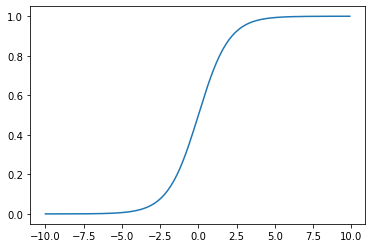

In [1]:
# Visualizing a sigmoid function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-10,10,0.1)   # start,stop,step
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x,y)
plt.show()

Pictorically, the NN becomes:

<img src="figures/activationFunction.png" width=800>

### Hyperparameters

* Hyperparameters are a part of the training algorithms, they are options and decisions to be made by the users.
* Unlike $w_{ij}$ and $b_j$, hyperparameters are not trainable parameters.
* But hyperparameters can also be "optimized" (usually by random search or grid search) to improve the accuracy of the NN predictions.
* Hyperparameters in a NN model include:
    1. Number of input nodes
    2. Number of hidden layers
    3. Number of nodes per hidden layer
    4. Learning rate
    5. Activation functions for hidden layers
    6. Output activation
    7. Loss function


## 3. Data set: MNIST

* The MNIST data set has 70000 small, black-and-white images of hand-written digits from 0 to 9.
* Images are all labeled with the digit each of them represents.
* Each image has 28x28 = 784 pixels.


In [2]:
data = np.load('mnist.npz')
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


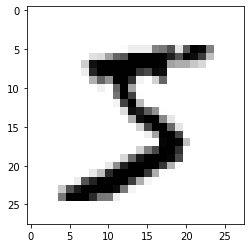

5


In [3]:
# plot an image
plt.imshow(x_train[0], cmap=plt.get_cmap('binary'))
plt.show()

# check the label
print(y_train[0])

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255

# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

int_encoded = label_encoder.fit_transform(y_train)
int_encoded = int_encoded.reshape(len(int_encoded),1)
y_train = onehot_encoder.fit_transform(int_encoded)

int_encoded = label_encoder.fit_transform(y_test)
int_encoded = int_encoded.reshape(len(int_encoded),1)
y_test = onehot_encoder.fit_transform(int_encoded)

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [9]:
# verify one-hot encoding works right
randidx = np.random.randint(0,10000)
print('randidx is:', randidx)
print(y_train[randidx])
print(data['y_train'][randidx])

randidx is: 1434
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


In [10]:
# Check the dimension of the training dataset
x_train.shape

(60000, 1, 784)

## 4. Code walk-through

In [11]:
# A function to initialize weights and bias with random numbers between [-0.5, 0.5)
def init_layer_weights(input_size, output_size):
    weights = np.random.rand(input_size, output_size) - 0.5;
    bias = np.random.rand(1, output_size) - 0.5;
    return weights, bias

# A function to calculate the mean squared error (MSE)
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

# A function to calculate the derivative of the mean squared error (MSE) with respect to y_true
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [12]:
def forward_propagation(input_data, layer):
    weights, bias = layer
    output = np.dot(input_data, weights) + bias
    return output

def backward_propagation(output_error, input_data, layer, learning_rate):
    weights, bias = layer
    input_error = np.dot(output_error, weights.T)
    weights_error = np.dot(input_data.T, output_error)
    weights_updated = weights -  (learning_rate * weights_error)
    bias_updated = bias - (learning_rate * output_error)
    updated_layer = (weights_updated, bias_updated)
    return input_error, updated_layer

def forward_propagation_activation(input_data):
    output = np.tanh(input_data)
    return output

def backward_propagation_activation(output_error, input_data):
    activation_prime = 1 - np.tanh(input_data)**2
    final_output_error = activation_prime * output_error
    return final_output_error

In [13]:
# In this example, we construct a three-layer neural network: one input layer, one hidden layer, and one output layer
layer1 = init_layer_weights(28*28,150);
layer2 = init_layer_weights(150,50);
layer3 = init_layer_weights(50,10);

In [14]:
trainSampleX = x_train[0]
trainSampleY = y_train[0]

In [15]:
trainSampleX.shape

(1, 784)

In [16]:
#forward pass
def fullforward(X, layer1,layer2,layer3):
    output1 = forward_propagation(X, layer1)
    output1act = forward_propagation_activation(output1)
    output2 = forward_propagation(output1act, layer2)
    output2act = forward_propagation_activation(output2)
    output3 = forward_propagation(output2act, layer3)
    output3act = forward_propagation_activation(output3)
    return output1,output2,output3,output1act,output2act,output3act

In [17]:
#backward pass
def fullbackward(X,outputError,layer1,layer2,layer3,output1,output2,output3,output1act,output2act,output3act,learning_rate):
    back_output3act = backward_propagation_activation(outputError, output3)
    back_output3, updated_layer3 = backward_propagation(back_output3act, output2act, layer3, learning_rate)
    back_output2act = backward_propagation_activation(back_output3, output2)
    back_output2, updated_layer2 = backward_propagation(back_output2act, output1act, layer2, learning_rate)
    back_output1act = backward_propagation_activation(back_output2, output1)
    back_output1, updated_layer1 = backward_propagation(back_output1act, trainSampleX, layer1, learning_rate)
    return updated_layer1, updated_layer2, updated_layer3

In [18]:
def train(x_train, y_train, nsamples, layers, epochs, learning_rate):
    updated_layer1, updated_layer2, updated_layer3 = layers[0], layers[1], layers[2]
    for j in range(epochs):
        E = 0;
        for i in range(nsamples):
            x = x_train[i]
            y = y_train[i]
            #fwd pass
            output1,output2,output3,output1act,output2act,output3act = fullforward(x, updated_layer1, updated_layer2, updated_layer3)
            #compute loss
            E += mse(y,output3act)
            #compute loss derivative to initiate backward pass
            dE = mse_prime(y,output3act)
            #backward pass
            updated_layer1, updated_layer2, updated_layer3 = fullbackward(x,dE,updated_layer1, updated_layer2, updated_layer3, 
                                                                          output1, output2, output3, output1act, output2act, 
                                                                          output3act, learning_rate)
            #avg error
            E /= nsamples
        print("Epoch number: ", j)
        print("Epoch error is: ", E)
        
    return (updated_layer1, updated_layer2, updated_layer3)

In [19]:
len(layer1)

2

In [20]:
layer1[0].shape

(784, 150)

In [21]:
nsamples = 5000
learning_rate = 0.1
epochs = 35
layers = (layer1, layer2, layer3)
trained_layers = train(x_train, y_train, nsamples, layers, epochs, learning_rate)

Epoch number:  0
Epoch error is:  1.4790031864762452e-05
Epoch number:  1
Epoch error is:  1.1502579593924549e-05
Epoch number:  2
Epoch error is:  1.0272074576378602e-05
Epoch number:  3
Epoch error is:  8.075198716879655e-06
Epoch number:  4
Epoch error is:  5.836097045380448e-06
Epoch number:  5
Epoch error is:  3.237587793581128e-06
Epoch number:  6
Epoch error is:  9.266213490437523e-07
Epoch number:  7
Epoch error is:  5.378851973430087e-07
Epoch number:  8
Epoch error is:  4.5342639957431964e-07
Epoch number:  9
Epoch error is:  6.05531301075906e-07
Epoch number:  10
Epoch error is:  7.473854690474573e-07
Epoch number:  11
Epoch error is:  1.3502108323429803e-06
Epoch number:  12
Epoch error is:  1.1050273726839283e-06
Epoch number:  13
Epoch error is:  1.0370903894815545e-06
Epoch number:  14
Epoch error is:  1.1473595583250445e-06
Epoch number:  15
Epoch error is:  1.0887792127213939e-06
Epoch number:  16
Epoch error is:  9.748397893452172e-07
Epoch number:  17
Epoch error is:

In [22]:
x_test.shape

(10000, 1, 784)

In [23]:
x_train.shape

(60000, 1, 784)

In [24]:
#testing
idx = np.random.randint(0,10000)
print("Test Sample ID: ", idx)
testSampleX = x_test[idx]
testSampleY = y_test[idx]

_,_,_,_,_, pred = fullforward(testSampleX, trained_layers[0], trained_layers[1], trained_layers[2])
print("Prediction: ", np.argmax(pred))
print("Truth: ", np.argmax(testSampleY))

Test Sample ID:  5971
Prediction:  9
Truth:  9


In [25]:
pred_results=[]
n_test_samples = 10000
for i in range(n_test_samples):
    _,_,_,_,_, pred = fullforward(x_test[i], trained_layers[0], trained_layers[1], trained_layers[2])
    final_pred = np.argmax(pred)
    truth_value = np.argmax(y_test[i])
    #print("Prediction: ", final_pred)
    #print("Truth: ", truth_value)
    err = np.abs(final_pred - truth_value)
    pred_results.append(err)

In [26]:
percent_accuracy = (n_test_samples -  np.count_nonzero(np.asarray(pred_results)))/100
print("Percent Accuracy of NN: ", percent_accuracy)

Percent Accuracy of NN:  83.38
